In [86]:
! pip install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
! pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
from sklearn.datasets import fetch_california_housing
dataset=fetch_california_housing()
print(type(dataset))

<class 'sklearn.utils._bunch.Bunch'>


In [90]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [91]:
data=pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [92]:
data2=pd.DataFrame(data=dataset.target,columns=dataset.target_names)
data2.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [93]:
df=pd.concat([data,data2],axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [94]:
df["Target"]=df["MedHouseVal"]
df.drop(["MedHouseVal"],axis=1,inplace=True)

In [95]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [96]:
df.shape

(20640, 9)

In [97]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [98]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [99]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

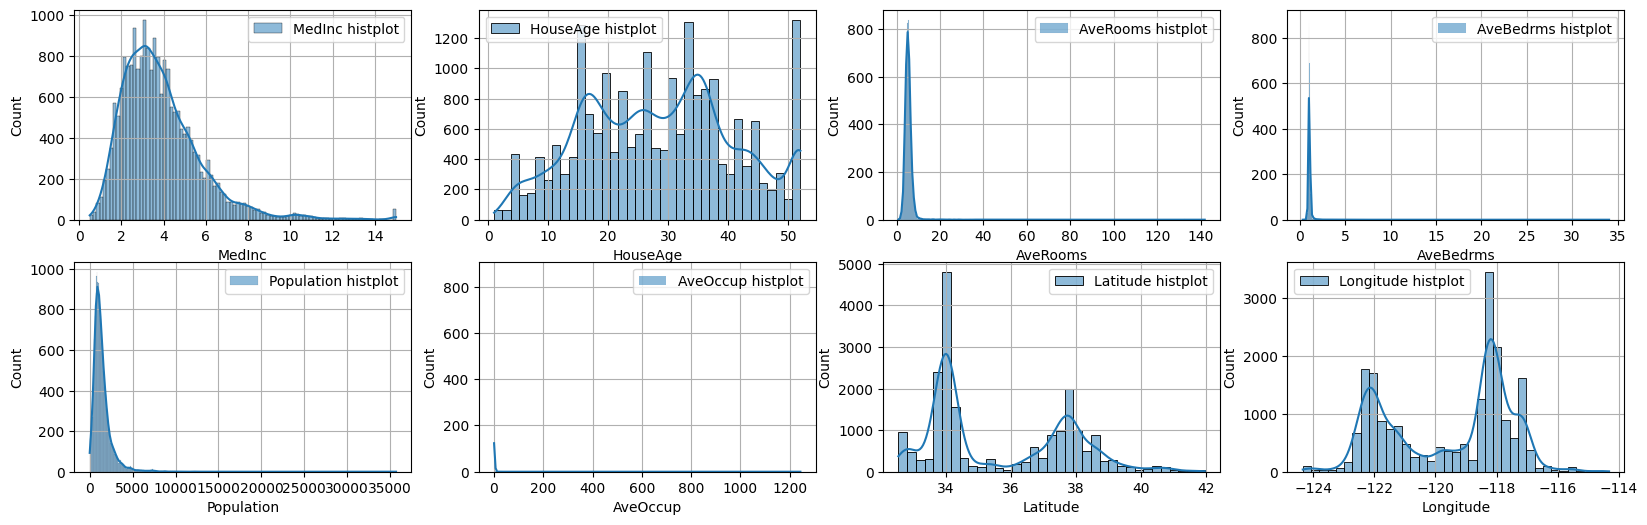

In [100]:
import warnings
warnings.filterwarnings("ignore")
col=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']
fig,ax=plt.subplots(2,4,figsize=(20,6))
for index, feature in enumerate(col):
    row=index//4
    col=index%4
    sns.histplot(df[feature],alpha=0.5,kde=True,ax=ax[row,col],label="{} histplot".format(feature))
    ax[row,col].legend()
    ax[row,col].grid()


plt.show()
    


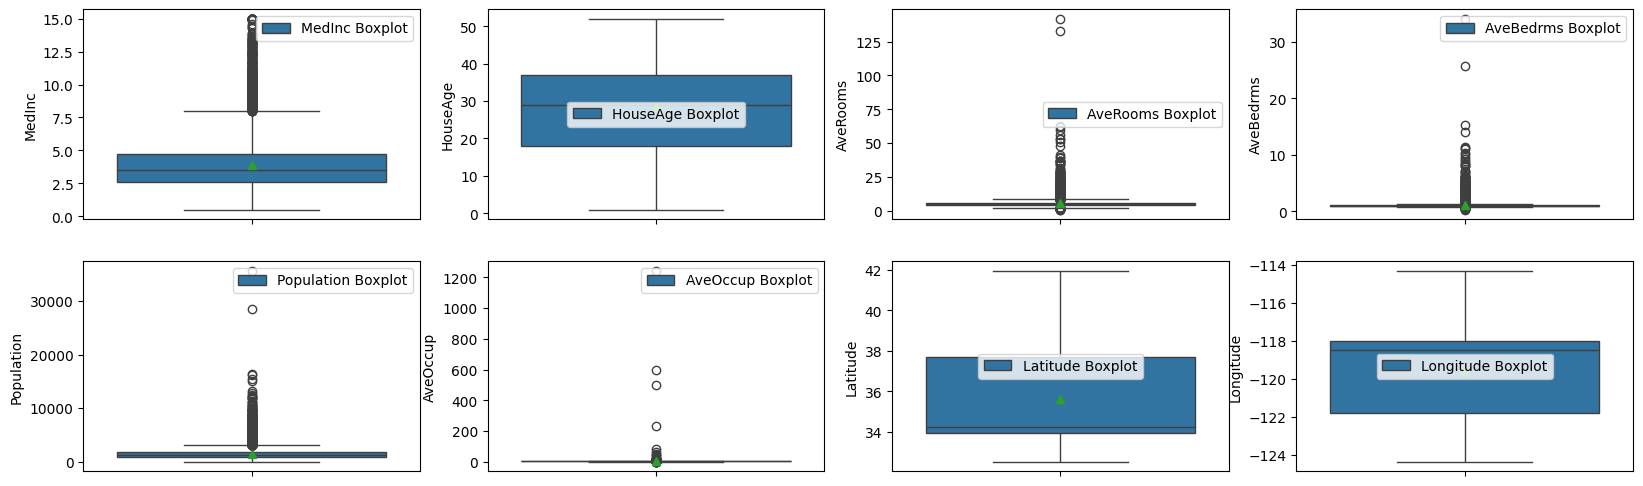

In [101]:
col=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']
fig,ax=plt.subplots(2,4,figsize=(20,6))
for index, feature in enumerate(col):
    row=index//4
    col=index%4
    sns.boxplot(df[feature],showmeans=True,ax=ax[row,col],label="{} Boxplot".format(feature))
    ax[row,col].legend()

plt.show()

In [102]:
def cap_outliers(series):
    Q1=series.quantile(0.25)
    Q3=series.quantile(0.75)
    IQR=Q3-Q1
    max_value=Q3+1.5*IQR
    min_value=Q1-1.5*IQR
    return series.apply(lambda x:max_value if x>max_value else (min_value if x<min_value else x))

col=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']
for i in col:
    df[i]=cap_outliers(df[i])

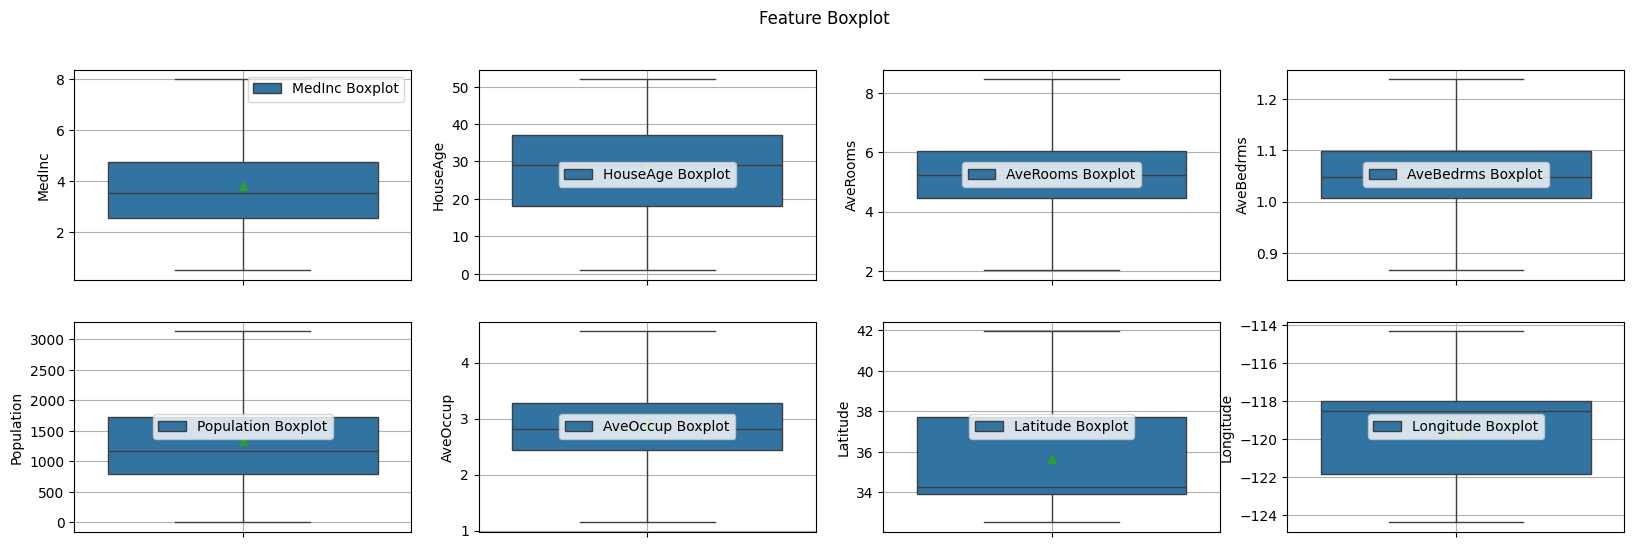

In [103]:
col=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']
fig,ax=plt.subplots(2,4,figsize=(20,6))
for index, feature in enumerate(col):
    row=index//4
    col=index%4
    sns.boxplot(df[feature],showmeans=True,ax=ax[row,col],label="{} Boxplot".format(feature))
    ax[row,col].legend()
    ax[row,col].grid(True)
plt.suptitle("Feature Boxplot")
plt.show()

In [104]:
corr=df.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.142435,0.657482,-0.227488,0.000984,-0.069799,-0.084654,-0.015461,0.689001
HouseAge,-0.142435,1.000000,-0.230360,-0.132477,-0.307620,-0.006318,0.011173,-0.108197,0.105623
AveRooms,0.657482,-0.230360,1.000000,0.176210,-0.097907,-0.035624,0.128647,-0.068379,0.311003
AveBedrms,-0.227488,-0.132477,0.176210,1.000000,0.002474,-0.121060,0.063221,0.011850,-0.096055
Population,0.000984,-0.307620,-0.097907,0.002474,1.000000,0.225746,-0.133225,0.116115,-0.032739
AveOccup,-0.069799,-0.006318,-0.035624,-0.121060,0.225746,1.000000,-0.170149,0.178649,-0.281148
Latitude,-0.084654,0.011173,0.128647,0.063221,-0.133225,-0.170149,1.000000,-0.924664,-0.144160
Longitude,-0.015461,-0.108197,-0.068379,0.011850,0.116115,0.178649,-0.924664,1.000000,-0.045967
Target,0.689001,0.105623,0.311003,-0.096055,-0.032739,-0.281148,-0.144160,-0.045967,1.000000


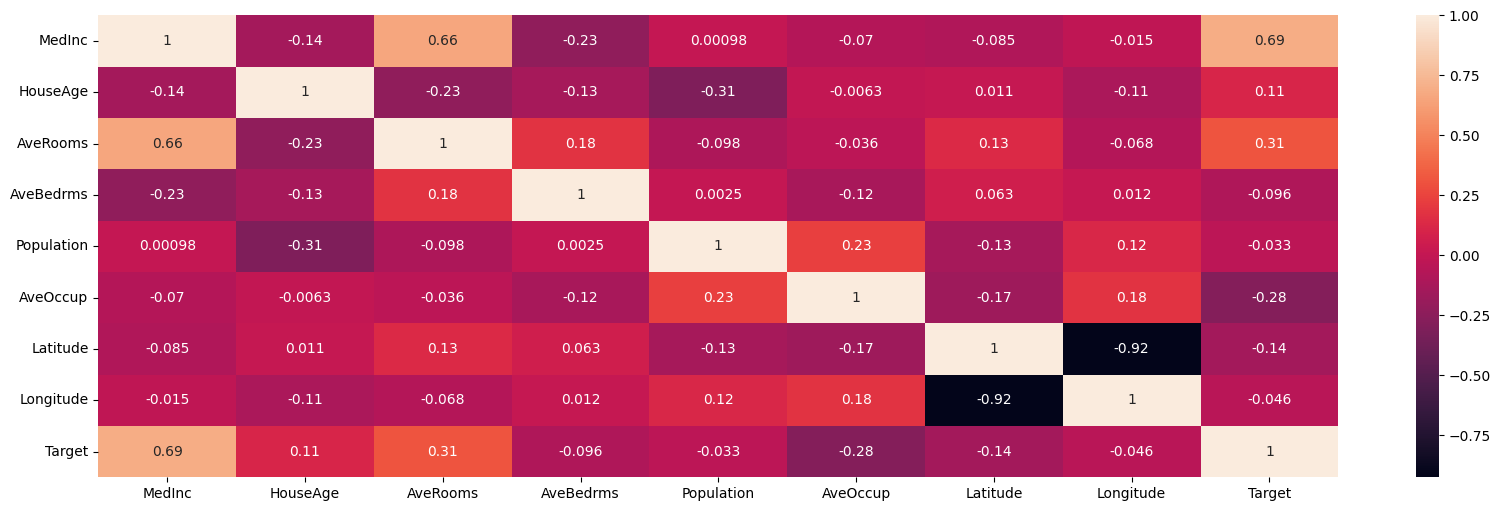

In [105]:
plt.figure(figsize=(20,6))
sns.heatmap(corr,annot=True)
plt.show()

In [106]:
x=df.iloc[:,:-1]
y=df.loc[:,["Target"]]

In [107]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.013025,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.013025,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.257400,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.643100,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.846200,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.560300,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.556800,18.0,6.114035,1.239697,356.0,3.122807,39.49,-121.21
20637,1.700000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.867200,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


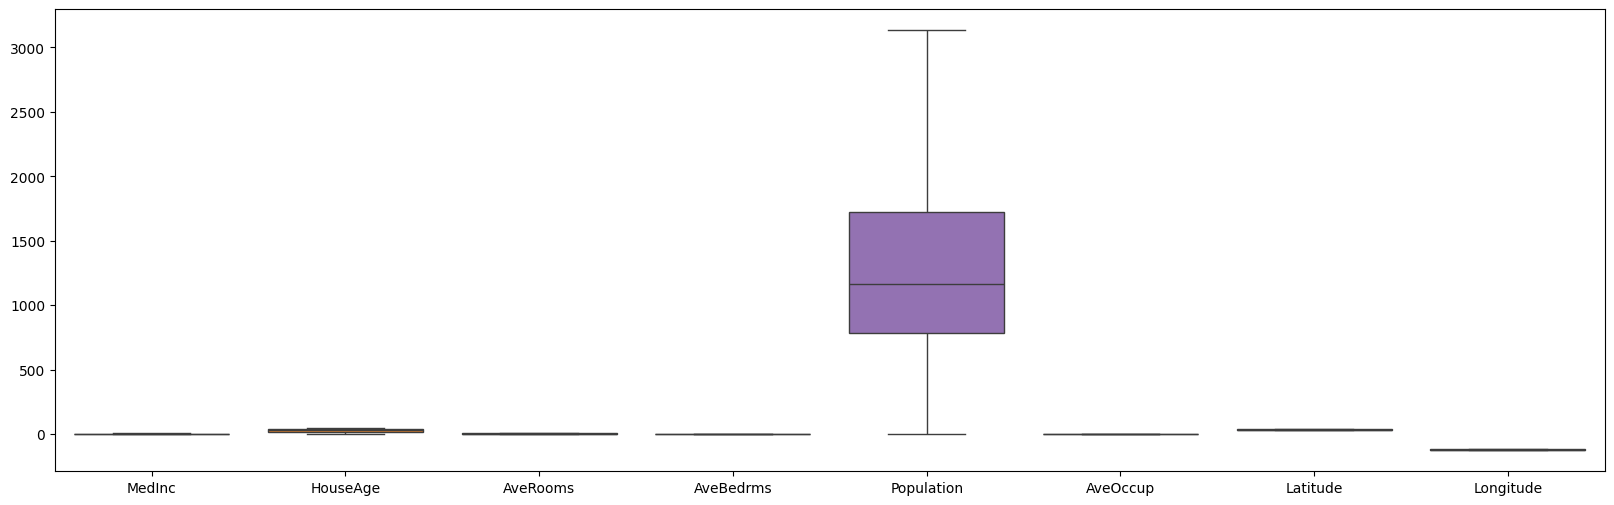

In [108]:
plt.figure(figsize=(20,6))
sns.boxplot(x)
plt.show()

In [109]:
! pip install Statsmodels


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
import statsmodels.api as sm
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     5153.
Date:                Tue, 19 Aug 2025   Prob (F-statistic):               0.00
Time:                        21:46:51   Log-Likelihood:                -20910.
No. Observations:               20640   AIC:                         4.184e+04
Df Residuals:                   20631   BIC:                         4.191e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -31.9644      0.633    -50.518      0.0

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [113]:
scalar=StandardScaler()
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)

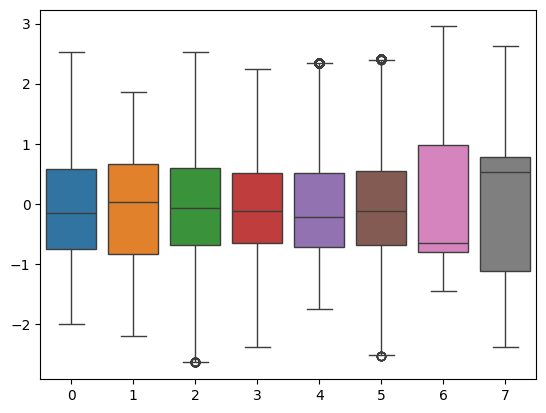

In [114]:
sns.boxplot(data=x_train_scaled)
plt.show()

In [115]:
from sklearn.ensemble import RandomForestRegressor
rd=RandomForestRegressor()
rd.fit(x_train_scaled,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [116]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rd,x_train_scaled,y_train)
print(score)
print(f"Mean:{score.mean()}")
print(f"Std.dev:{score.std()}")

[0.80557926 0.79505176 0.80756086 0.80306566 0.80346258]
Mean:0.8029440231948983
Std.dev:0.004262188063242891


In [117]:
y_pred_test=rd.predict(x_test_scaled)

In [118]:
y_pred_train=rd.predict(x_train_scaled)

In [120]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(mean_squared_error(y_test,y_pred_test))
print(mean_absolute_error(y_test,y_pred_test))
print(r2_score(y_test,y_pred_test))

0.25422847560987716
0.3286414704699614
0.8059930297858956


In [121]:
print(mean_squared_error(y_train,y_pred_train))
print(mean_absolute_error(y_train,y_pred_train))
print(r2_score(y_train,y_pred_train))

0.0356990082991156
0.12277129092781044
0.9732947410540688


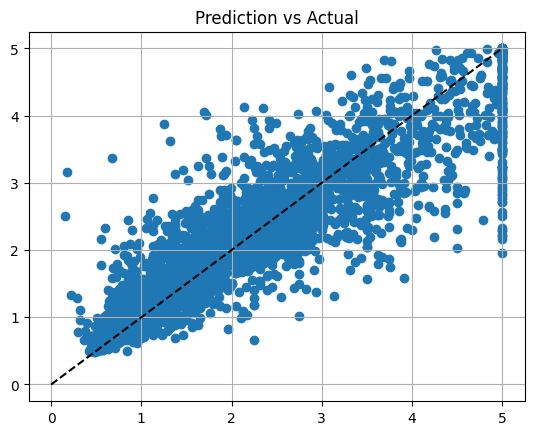

In [127]:
plt.scatter(y_test,y_pred_test)
plt.plot([0,5],[0,5],linestyle="dashed",color="black",label="Best fit line")
plt.title("Prediction vs Actual")
plt.grid()
plt.show()

In [128]:
import pickle 

with open("model.pkl","wb") as f:
    pickle.dump(rd,f)

In [129]:
with open("scaler.pkl","wb") as f:
    pickle.dump(scalar,f)